# ADA-USD Analysis

For this step, we are going to analyze the ADA/USD historical dataset that we retrieve from Kraken API in the previous steps.

In [1]:
import pandas as pd
import datetime

df = pd.read_csv('ADAUSD_trades_data.csv')
df.head()

,Time,Price,Volume,BuySell,MarketLimit,Misc
0,2021-02-01 00:00:21.149600000,0.345201,55.000000,b,m,NaN
1,2021-02-01 00:00:23.852900096,0.345200,1830.764000,s,l,NaN
2,2021-02-01 00:00:30.689299968,0.345000,3000.000000,s,l,NaN
3,2021-02-01 00:00:30.692500224,0.345000,367.754638,s,l,NaN
4,2021-02-01 00:01:22.767899904,0.345038,1112.100000,b,m,NaN


Next, we are going to do some data cleanings.

In [2]:
print(df.shape)
df.describe()

(5103641, 6)


,Price,Volume,Misc
count,5.103641e+06,5.103641e+06,0.0
mean,1.377395e+00,1.761916e+03,NaN
std,4.088740e-01,4.609281e+03,NaN
min,1.560000e-01,1.000000e-08,NaN
25%,1.135041e+00,4.036718e+01,NaN
50%,1.315623e+00,3.500000e+02,NaN
75%,1.613713e+00,1.630233e+03,NaN
max,2.720057e+00,7.904479e+05,NaN


In [3]:
df['BuySell'].unique()

array(['b', 's'], dtype=object)

In [4]:
df['MarketLimit'].unique()

array(['m', 'l'], dtype=object)

In [5]:
df.isna().sum()

Time                 0
Price                0
Volume               0
BuySell              0
MarketLimit          0
Misc           5103641
dtype: int64

In [6]:
df.drop('Misc', axis=1, inplace=True)
buysell = df["BuySell"].map({
    'b': 1,
    's': 0
})

df['BuySell']=buysell
marketlimit = df["MarketLimit"].map({
    'm': 1,
    'l': 0
})

df['MarketLimit']=marketlimit

In [7]:
df['Time'] = pd.to_datetime(df['Time'], format = '%Y-%m-%d %H:%M:%S')
df.set_index('Time', inplace = True)

In [8]:
ohlctv = df.resample('1H', label='left')['Price'].agg(['first','max','min','last','count']).set_axis(['open','high','low','close','trades'], axis = 1)
ohlctv

,open,high,low,close,trades
Time,,,,,
2021-02-01 00:00:00,0.345201,0.345201,0.333000,0.338288,751
2021-02-01 01:00:00,0.338326,0.347739,0.336650,0.346719,411
2021-02-01 02:00:00,0.346425,0.348855,0.344155,0.345171,435
2021-02-01 03:00:00,0.344894,0.347160,0.343780,0.345702,261
2021-02-01 04:00:00,0.346420,0.349600,0.344916,0.346911,276
...,...,...,...,...,...
2021-08-22 20:00:00,2.578772,2.581937,2.553202,2.576898,762
2021-08-22 21:00:00,2.573794,2.613739,2.561045,2.612755,879
2021-08-22 22:00:00,2.612785,2.630000,2.600172,2.626914,1015


In [9]:
volume = df.resample('1H')['Volume'].agg(['sum'])

ohlctv['volume'] = volume
ohlctv

,open,high,low,close,trades,volume
Time,,,,,,
2021-02-01 00:00:00,0.345201,0.345201,0.333000,0.338288,751,2.285637e+06
2021-02-01 01:00:00,0.338326,0.347739,0.336650,0.346719,411,1.965493e+06
2021-02-01 02:00:00,0.346425,0.348855,0.344155,0.345171,435,2.325190e+06
2021-02-01 03:00:00,0.344894,0.347160,0.343780,0.345702,261,3.742172e+05
2021-02-01 04:00:00,0.346420,0.349600,0.344916,0.346911,276,1.422267e+06
...,...,...,...,...,...,...
2021-08-22 20:00:00,2.578772,2.581937,2.553202,2.576898,762,9.810337e+05
2021-08-22 21:00:00,2.573794,2.613739,2.561045,2.612755,879,9.957001e+05
2021-08-22 22:00:00,2.612785,2.630000,2.600172,2.626914,1015,1.371534e+06


In [10]:
ohlctv.drop(ohlctv.tail(1).index,inplace=True)

In [11]:
ohlctv.describe()

,open,high,low,close,trades,volume
count,4867.000000,4867.000000,4867.000000,4867.000000,4872.000000,4.872000e+03
mean,1.344287,1.358640,1.328761,1.344788,1047.544951,1.845687e+06
std,0.358532,0.362845,0.354288,0.358808,1149.488230,2.363521e+06
min,0.338326,0.345201,0.156000,0.338288,0.000000,0.000000e+00
25%,1.175871,1.184287,1.166332,1.176238,406.000000,5.533485e+05
50%,1.301059,1.312195,1.288801,1.301055,716.500000,1.119312e+06
75%,1.482538,1.500000,1.467534,1.483246,1262.000000,2.209685e+06
max,2.643012,2.720057,2.621201,2.710000,18898.000000,3.561810e+07


In [12]:
ohlctv.dropna()

,open,high,low,close,trades,volume
Time,,,,,,
2021-02-01 00:00:00,0.345201,0.345201,0.333000,0.338288,751,2.285637e+06
2021-02-01 01:00:00,0.338326,0.347739,0.336650,0.346719,411,1.965493e+06
2021-02-01 02:00:00,0.346425,0.348855,0.344155,0.345171,435,2.325190e+06
2021-02-01 03:00:00,0.344894,0.347160,0.343780,0.345702,261,3.742172e+05
2021-02-01 04:00:00,0.346420,0.349600,0.344916,0.346911,276,1.422267e+06
...,...,...,...,...,...,...
2021-08-22 19:00:00,2.565727,2.598381,2.563509,2.583232,685,5.526943e+05
2021-08-22 20:00:00,2.578772,2.581937,2.553202,2.576898,762,9.810337e+05
2021-08-22 21:00:00,2.573794,2.613739,2.561045,2.612755,879,9.957001e+05


In [13]:
ohlctv.isna().sum()

open      5
high      5
low       5
close     5
trades    0
volume    0
dtype: int64

In [14]:
ohlctv.loc[lambda ohlctv: ohlctv['trades']== 0]

,open,high,low,close,trades,volume
Time,,,,,,
2021-07-22 22:00:00,NaN,NaN,NaN,NaN,0,0.0
2021-07-22 23:00:00,NaN,NaN,NaN,NaN,0,0.0
2021-07-23 00:00:00,NaN,NaN,NaN,NaN,0,0.0
2021-07-23 01:00:00,NaN,NaN,NaN,NaN,0,0.0
2021-07-23 13:00:00,NaN,NaN,NaN,NaN,0,0.0


In [15]:
ohlctv.drop(ohlctv.loc[lambda ohlctv: ohlctv['trades']== 0].index, inplace=True)

<AxesSubplot:xlabel='Date Time', ylabel='Price'>

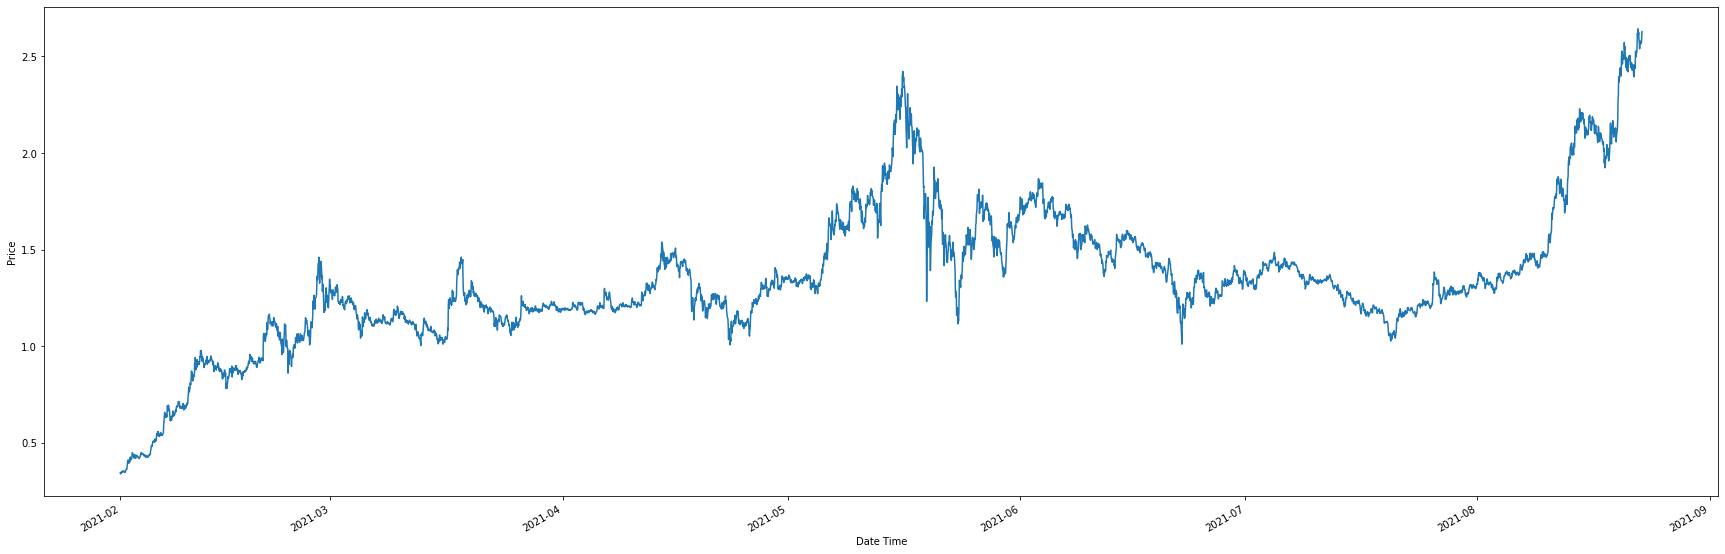

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

ohlctv['open'].plot.line(ylabel = 'Price', xlabel= 'Date Time', figsize=(30,10))

<AxesSubplot:xlabel='Date Time', ylabel='Price'>

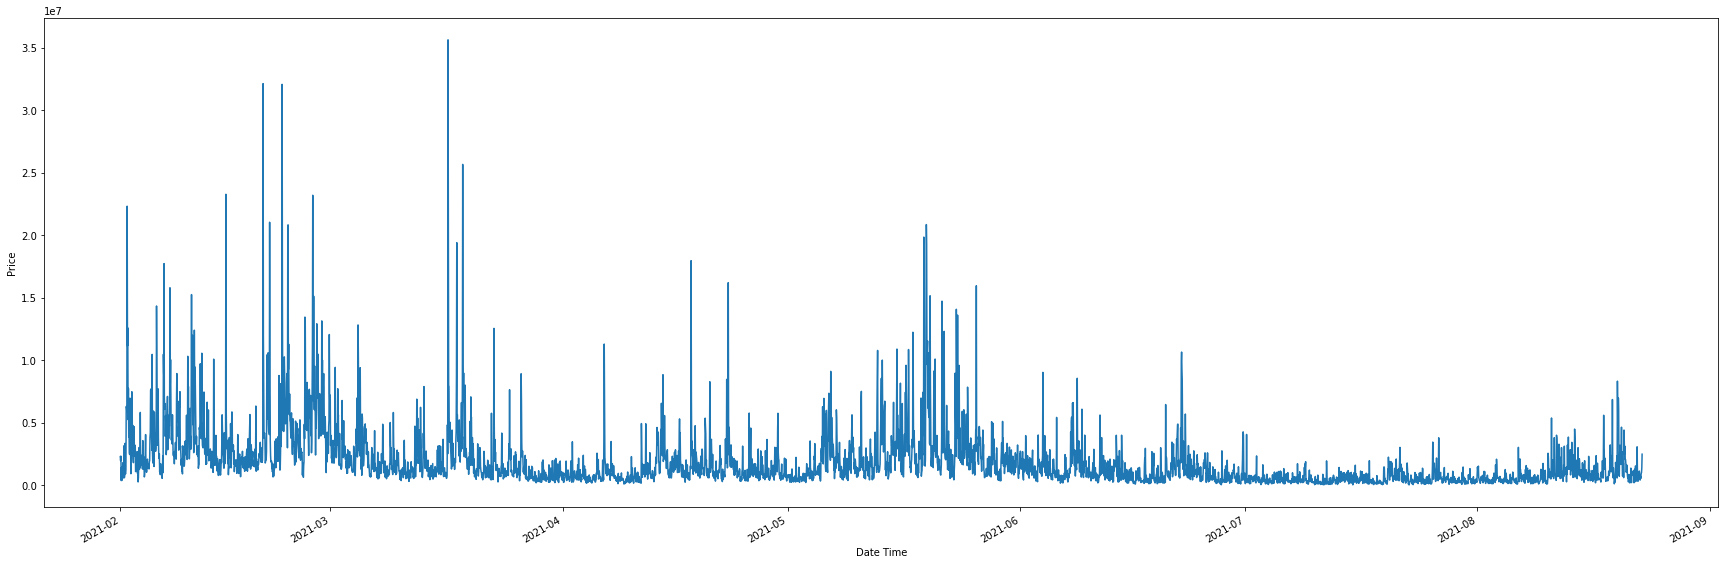

In [17]:
ohlctv['volume'].plot.line(ylabel = 'Price', xlabel= 'Date Time', figsize=(30,10))

<AxesSubplot:xlabel='Date Time', ylabel='Price'>

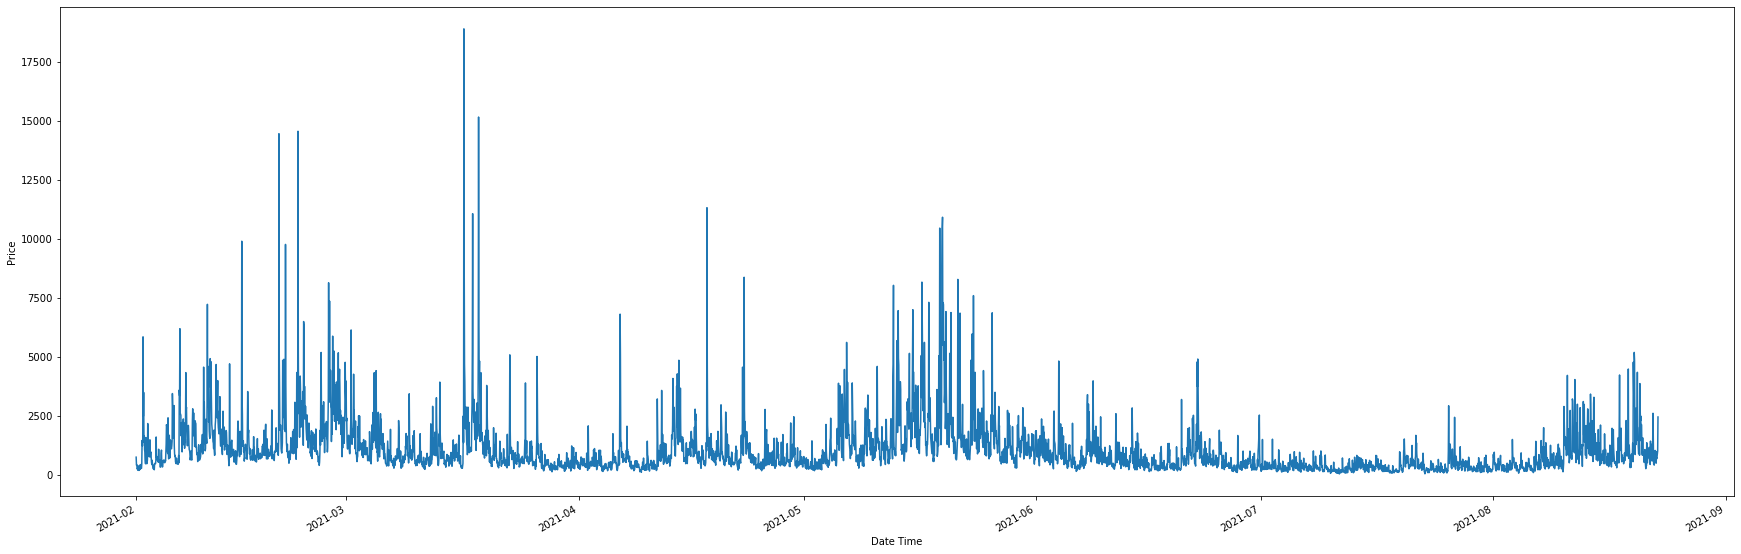

In [18]:
ohlctv['trades'].plot.line(ylabel = 'Price', xlabel= 'Date Time', figsize=(30,10))

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
X = ohlctv['volume'].to_numpy()
Y = ohlctv['open'].to_numpy()

X=np.reshape(X,(-1,1))
Y=np.reshape(Y,(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state= 42) 

In [21]:
# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train 100-nearest neighbors model
knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=100)
)
knn_model.fit(X=X_train, y=y_train)

#ensemble model
ensemble_model = VotingRegressor([
    ("linear", linear_model), 
    ("knn", knn_model)
])
ensemble_model.fit(X=X_train, y=y_train)

/opt/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingRegressor(estimators=[('linear', LinearRegression()),
                            ('knn',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('kneighborsregressor',
                                              KNeighborsRegressor(n_neighbors=100))]))])

In [22]:
from sklearn.model_selection import cross_val_score

for model in [linear_model, knn_model,ensemble_model]: # models 
    print(-cross_val_score(model, X=X_train, y=y_train, cv=5,
                           scoring="neg_mean_squared_error").mean())

0.1260598753308532
0.12729582010669183
0.12627086951733277


/opt/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [23]:
prediction = linear_model.predict(X_test)

error_value = metrics.r2_score(y_test, prediction)
print('R squared error:', error_value)

R squared error: 0.009019868700021805


In [24]:
X = ohlctv['trades'].to_numpy()
Y = ohlctv['open'].to_numpy()

X=np.reshape(X,(-1,1))
Y=np.reshape(Y,(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state= 42) 

# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train 100-nearest neighbors model
knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=100)
)
knn_model.fit(X=X_train, y=y_train)

#ensemble model
ensemble_model = VotingRegressor([
    ("linear", linear_model), 
    ("knn", knn_model)
])
ensemble_model.fit(X=X_train, y=y_train)

for model in [linear_model, knn_model,ensemble_model]: # models 
    print(-cross_val_score(model, X=X_train, y=y_train, cv=5,
                           scoring="neg_mean_squared_error").mean())

/opt/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.1267060684716172


/opt/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.1274546087527178
0.12663428718322478


/opt/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [25]:
prediction = ensemble_model.predict(X_test)

error_value = metrics.r2_score(y_test, prediction)
print('R squared error:', error_value)

R squared error: 0.0041976775876572114


In [26]:
X = ohlctv[['volume','trades']]
Y = ohlctv['open']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state= 42) 

# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train 100-nearest neighbors model
knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=100)
)
knn_model.fit(X=X_train, y=y_train)

#ensemble model
ensemble_model = VotingRegressor([
    ("linear", linear_model), 
    ("knn", knn_model)
])
ensemble_model.fit(X=X_train, y=y_train)

for model in [linear_model, knn_model,ensemble_model]: # models 
    print(-cross_val_score(model, X=X_train, y=y_train, cv=5,
                           scoring="neg_mean_squared_error").mean())

0.08949381743610844
0.08175734482423935
0.0805003168177343


In [27]:
prediction = ensemble_model.predict(X_test)

error_value = metrics.r2_score(y_test, prediction)
print('R squared error:', error_value)

R squared error: 0.3817762278059429


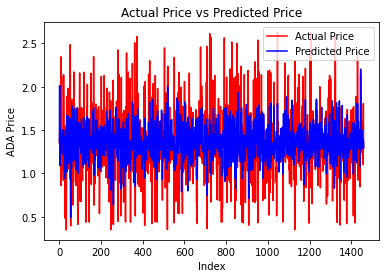

<Figure size 1800x720 with 0 Axes>

In [28]:
y_test = list(y_test)

plt.plot(y_test, color = 'red', label = 'Actual Price')
plt.plot(prediction, color = 'blue', label = 'Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Index')
plt.ylabel('ADA Price')
plt.legend()
plt.figure(figsize=(25,10))
plt.show()

In [33]:
ensemble_model.predict([[2000000,1100]])

array([1.32633853])

In [34]:
ensemble_model.predict([[1000000,600]])

array([1.31815362])

# Conclusion

In conclusion, using only volume and number of trades to predict the price of Cardano is not sufficient. We need to find another feature to improve our results.